# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# **Loading Dataset**
Source : [Kaggle - Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)

In [2]:
##from google.colab import drive
##drive.mount('/content/drive')

In [3]:
#train_path =  '/content/drive/MyDrive/Colab Notebooks/train.csv'
#test_path =  '/content/drive/MyDrive/Colab Notebooks/test.csv'

In [4]:
df_1=pd.read_csv(r'C:\Users\arish\Desktop\Git-Hub\Fc\train.csv')

In [5]:
df_1.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The emotions are labeled as numbers, these numbers are then mapped to the corresponding emotions they represent (as mentioned in data description).

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [6]:
emotions=np.array([df_1['emotion']])

In [7]:
emotions=emotions.reshape(28709,)

In [8]:
emotion_string=[]
for emotion in emotions:
    if(emotion==0):
        emotion_string.append('Angry')
        continue
    if(emotion==1):
        emotion_string.append('Disgust')
        continue
    if(emotion==2):
        emotion_string.append('Fear')
        continue
    if(emotion==3):
        emotion_string.append('Happy')
        continue
    if(emotion==4):
        emotion_string.append('Sad')
        continue
    if(emotion==5):
        emotion_string.append('Surprise')
        continue
    if(emotion==6):
        emotion_string.append('Neutral')
        continue

In [9]:
emotion_string

['Angry',
 'Angry',
 'Fear',
 'Sad',
 'Neutral',
 'Fear',
 'Sad',
 'Happy',
 'Happy',
 'Fear',
 'Angry',
 'Neutral',
 'Neutral',
 'Neutral',
 'Happy',
 'Surprise',
 'Happy',
 'Fear',
 'Neutral',
 'Sad',
 'Sad',
 'Fear',
 'Angry',
 'Angry',
 'Happy',
 'Happy',
 'Surprise',
 'Angry',
 'Happy',
 'Surprise',
 'Happy',
 'Neutral',
 'Happy',
 'Fear',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Angry',
 'Surprise',
 'Angry',
 'Happy',
 'Sad',
 'Angry',
 'Neutral',
 'Fear',
 'Happy',
 'Neutral',
 'Fear',
 'Fear',
 'Fear',
 'Surprise',
 'Surprise',
 'Neutral',
 'Sad',
 'Surprise',
 'Angry',
 'Happy',
 'Sad',
 'Fear',
 'Neutral',
 'Surprise',
 'Happy',
 'Sad',
 'Happy',
 'Angry',
 'Sad',
 'Happy',
 'Angry',
 'Surprise',
 'Sad',
 'Fear',
 'Sad',
 'Fear',
 'Angry',
 'Neutral',
 'Angry',
 'Angry',
 'Surprise',
 'Sad',
 'Happy',
 'Surprise',
 'Happy',
 'Neutral',
 'Fear',
 'Fear',
 'Sad',
 'Sad',
 'Surprise',
 'Sad',
 'Angry',
 'Angry',
 'Neutral',
 'Angry',
 'Neutral',
 'Fear',
 'Fear',
 'Happy

In [10]:
df_1.shape

(28709, 2)

In [11]:
pix1=df_1['pixels'][0]

In [12]:
pixels=df_1['pixels']

In [13]:
len(pixels)

28709

# **Forming images from pixels**

### Creating Feature Variables

In [14]:
x_features=[]
for i in range(28709):
    arr=[]
    for j in pixels[i].split(' '):
        arr.append(int(j))
    x_features.append(np.array(arr).reshape(48,48))

In [15]:
x_features=np.array(x_features)

In [16]:
x_features=np.expand_dims(x_features,axis=3)

In [17]:
import pickle
save_x_features=open('x_features','wb')
pickle.dump(x_features,save_x_features)
save_x_features.close()

In [18]:
import matplotlib as m
m.__version__

'3.3.4'

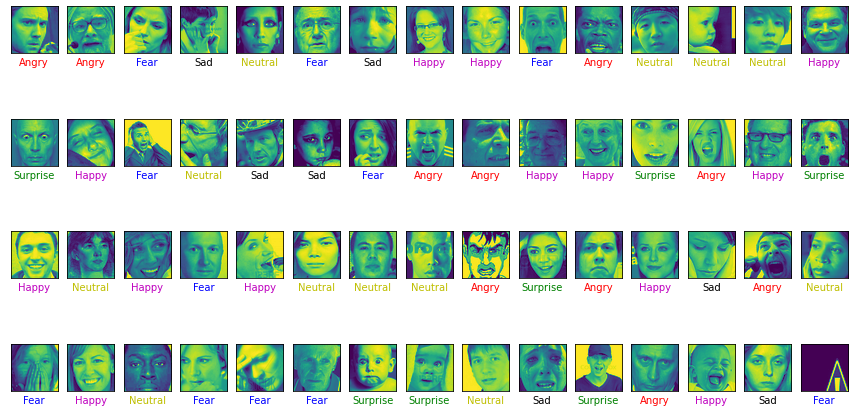

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,10))
columns=15
rows=5
for i in range(60):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_features[i])
    plt.xticks([])
    plt.yticks([])
    if(emotion_string[i]=='Angry'):
        color='r'
    if(emotion_string[i]=='Surprise'):
        color='g'
    if(emotion_string[i]=='Fear'):
        color='b'
    if(emotion_string[i]=='Happy'):
        color='m'
    if(emotion_string[i]=='Neutral'):
        color='y'
    if(emotion_string[i]=='Disgust'):
        color='c'
    if(emotion_string[i]=='Sad'):
        color='k'
    plt.xlabel(emotion_string[i],color=color)
plt.show()

## Creating Target Variables

In [20]:
y=np.array(df_1['emotion'])

In [21]:
y.shape

(28709,)

In [22]:
arr=[]
for label in y:
    k=np.zeros(7)
    k[label]=1
    arr.append(k)

In [23]:
arr=np.array(arr)

In [24]:
arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
y_=open('save_emotions','wb')
pickle.dump(arr,y_)
y_.close()

# Min-Max Normalization of pixels



```
# X_norm = X - X.min() / X.max() - X.min()
```



In [26]:
x_features=x_features/255.0

In [27]:
x_features.shape

(28709, 48, 48, 1)

## **Splitting Train and Test data**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_features, arr, random_state=42, test_size=0.3)

In [29]:
X_train.shape

(20096, 48, 48, 1)

In [30]:
y_train.shape

(20096, 7)

In [31]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# **Building Model**

In [32]:
def build_model(hp):
    model_primary= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7,activation='softmax')]
        )

    # Compile Model. 
    model_primary.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model_primary

# **Hyperparameter tuning using kerastuner library**

In [33]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [34]:
tuner=RandomSearch(build_model, objective='val_accuracy', max_trials=10, directory='out')

In [35]:
tuner.search(X_train,y_train,epochs=3,validation_data=(X_test, y_test))

Trial 1 Complete [00h 00m 40s]
val_accuracy: 0.45570647716522217

Best val_accuracy So Far: 0.45570647716522217
Total elapsed time: 00h 00m 40s
INFO:tensorflow:Oracle triggered exit


On kerastuning, we found out the best parameter suitable for model. Now let's train this model for 50 epochs

In [37]:
model=tuner.get_best_models(num_models=1)[0]

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         1

In [39]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/50
314/314 [==============================] - 8s 24ms/step - loss: 1.3918 - accuracy: 0.4705 - val_loss: 1.3092 - val_accuracy: 0.5084
Epoch 2/50
314/314 [==============================] - 7s 23ms/step - loss: 1.3089 - accuracy: 0.4927 - val_loss: 1.2636 - val_accuracy: 0.5284
Epoch 3/50
314/314 [==============================] - 7s 23ms/step - loss: 1.2762 - accuracy: 0.5127 - val_loss: 1.2458 - val_accuracy: 0.5273
Epoch 4/50
314/314 [==============================] - 7s 23ms/step - loss: 1.2253 - accuracy: 0.5326 - val_loss: 1.2103 - val_accuracy: 0.5398
Epoch 5/50
314/314 [==============================] - 7s 22ms/step - loss: 1.1831 - accuracy: 0.5553 - val_loss: 1.1996 - val_accuracy: 0.5426
Epoch 6/50
314/314 [==============================] - 7s 22ms/step - loss: 1.1436 - accuracy: 0.5651 - val_loss: 1.2137 - val_accuracy: 0.5393
Epoch 7/50
314/314 [==============================] - 7s 22ms/step - loss: 1.0969 - accuracy: 0.5806 - val_loss: 1.1969 - val_accuracy: 0.5513

In [40]:
from PIL import Image
import numpy as np
im=Image.open('face_detect_hap.jpg')
arr=np.asarray(im)

In [41]:
arr.shape

(48, 48, 3)

In [42]:
arr=arr[:,:,1]

In [43]:
arr.shape

(48, 48)

In [44]:
arr=arr.reshape(1,48,48,1)

In [45]:
arr=(arr-arr.min())/(arr.max()-arr.min())

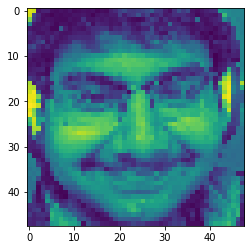

In [46]:
import matplotlib.pyplot as plt
plt.imshow(arr[0,:,:,0])

In [47]:
pred=model.predict(arr)

In [48]:
np.argmax(pred)

3

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral